<h1>Geometric Operations and Other Mathematical Tools</h1>

#### imports

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
# Function to plot two images side-by-side

def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

## Geometric Transformations

### Scaling

Resizing a image with the funtion <code>resize()</code> from <code>cv2</code>:
Considering the following image with the corresponding intensity values:

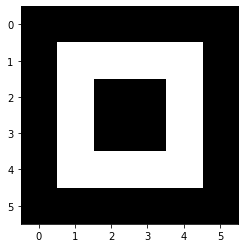

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [4]:
toy_image = np.zeros((6,6))
toy_image[1:5,1:5]=255
toy_image[2:4,2:4]=0
plt.imshow(toy_image,cmap='gray')
plt.show()
toy_image

To rescale along a specific axis:
*   `fx`: scale factor along the horizontal axis
*   `fy`: scale factor along the vertical axis


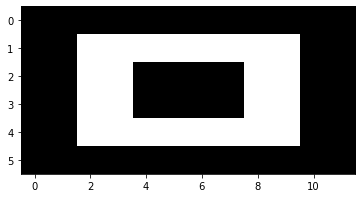

In [5]:
new_toy = cv2.resize(toy_image,None,fx=2, fy=1, interpolation = cv2.INTER_NEAREST )
plt.imshow(new_toy,cmap='gray')
plt.show()

Using cat.jpg image

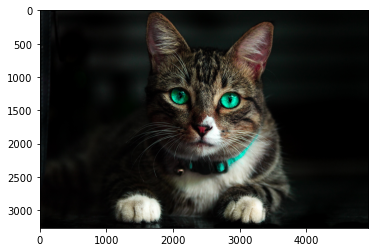

In [8]:
image = cv2.imread("cat.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Scaling the <b>horizontal</b> axis by two and leave the vertical axis as is:

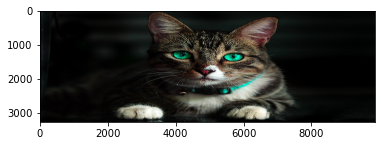

old image shape: (3264, 4928, 3) new image shape: (3264, 9856, 3)


In [9]:
new_image = cv2.resize(image, None, fx=2, fy=1, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

Scaling the <b>vertical</b> axis by two:

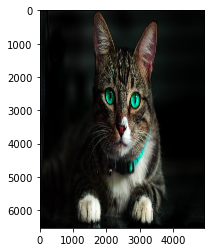

old image shape: (3264, 4928, 3) new image shape: (6528, 4928, 3)


In [10]:
new_image = cv2.resize(image, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

Scaling the horizontal axis and vertical axis by two:

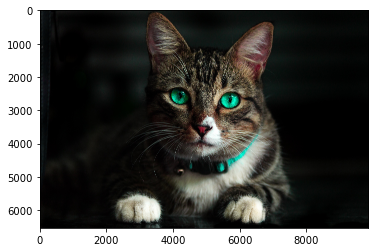

old image shape: (3264, 4928, 3) new image shape: (6528, 9856, 3)


In [11]:
new_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

Shrinking the image by setting the scaling factor to a real number betweeb 0 and 1:

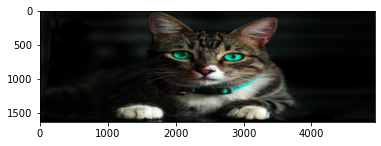

old image shape: (3264, 4928, 3) new image shape: (1632, 4928, 3)


In [12]:
new_image = cv2.resize(image, None, fx=1, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

We can also specify the number of rows and columns:

In [13]:
rows = 100
cols = 200

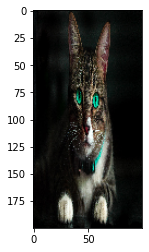

old image shape: (3264, 4928, 3) new image shape: (200, 100, 3)


In [14]:
new_image = cv2.resize(image, (100, 200), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

## Translation

Translation is  when you  shift the location of the image. <code>tx</code> is the number of pixels you shift the location in the horizontal direction and <code>ty</code> is the number of pixels you shift in the vertical direction. You can create the transformation matrix $M$ to shift the image.

In [15]:
tx = 100
ty = 0
M = np.float32([[1, 0, tx], [0, 1, ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

In [16]:
# The shape of the image is given by:
rows, cols, _ = image.shape

We use the function <code>warpAffine</code> from the <code>cv2</code> module. The first input parater is an image array, the second input parameter is the transformation matrix <code>M</code>, and the final input paramter is the length and width of the output image $(cols,rows)$:

In [17]:
new_image = cv2.warpAffine(image, M, (cols, rows))

Plotting images; the portions of the image that do not have any intensities are set to zero:

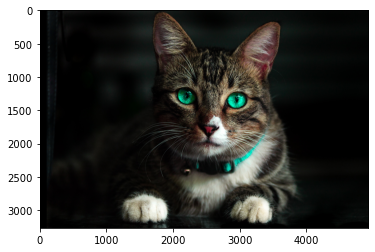

In [18]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can see some of the original image has been cut off. We can fix this by changing the output image size: <code>(cols + tx,rows + ty)</code>:

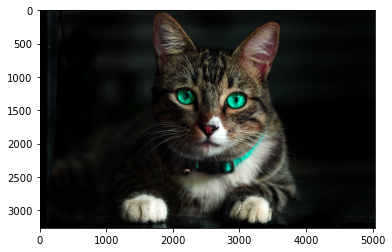

In [19]:
new_image = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can shift the image horizontally:

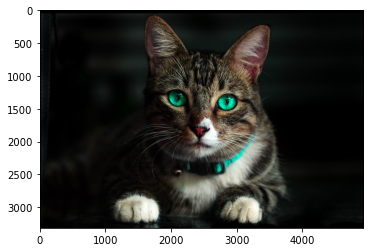

In [20]:
tx = 0
ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])
new_iamge = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_iamge, cv2.COLOR_BGR2RGB))
plt.show()

## Rotation

We can rotate an image by angle θ which is achieved by the Rotation Matrix <code>getRotationMatrix2D</code>.

<p><code>center</code>: Center of the rotation in the source image. We will only use the center of the image.</p>
<p><code>angle</code>: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).</p>
<p><code>scale</code>: Isotropic scale factor, in this course the value will be one.</p>


We can rotate our cat image by 45 degrees:

In [26]:
theta = 45.0
M = cv2.getRotationMatrix2D(center=(3, 3), angle=theta, scale=1)
new_toy_image = cv2.warpAffine(toy_image, M, (6, 6))

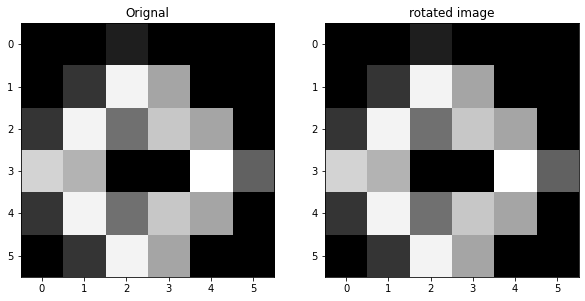

In [27]:
plot_image(new_cat_image, new_toy_image, title_1="Orignal", title_2="rotated image")

Looking at intensity values, we see that many values have been interpolated:


In [31]:
new_toy_image

array([[  0.        ,   0.        ,  28.38867188,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [195.234375  , 165.10253906,   0.        ,   0.        ,
        234.82910156,  89.89746094],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ]])

Performing the same operations on images:

In [32]:
M = cv2.getRotationMatrix2D(center=(cols // 2 - 1, rows // 2 - 1), angle=theta, scale=1)
new_image = cv2.warpAffine(image, M, (cols, rows))

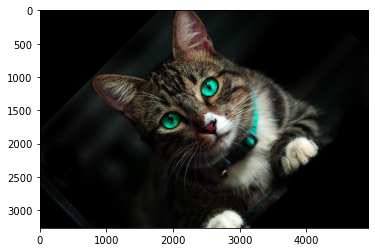

In [33]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

## Mathematical Operations

#### Array Operations

We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value.

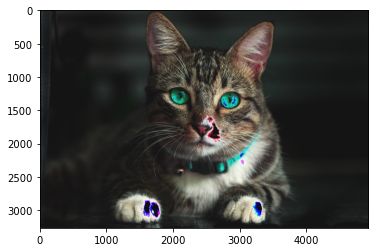

In [34]:
new_image = image + 20

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can also multiply every pixel's intensity value by a constant value.

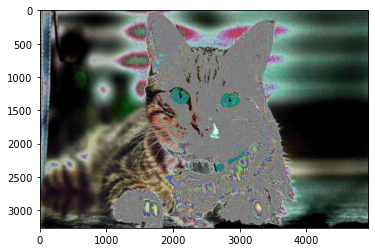

In [35]:
new_image = 10 * image
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

Adding the elements of two arrays of equal shape. Now we are going to generate an array of random noises with the same shape and data type as our image,

In [36]:
Noise = np.random.normal(0, 20, (rows, cols, 3)).astype(np.uint8)
Noise.shape

(3264, 4928, 3)

Adding the generated noise to the image and plot the result. We see the values that have corrupted the image:

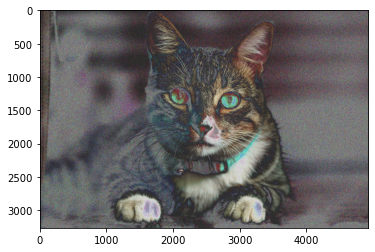

In [37]:
new_image = image + Noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can multiply the elemts of two arrays of equal shape. We can multiply the random image and the cat image and plot the result.

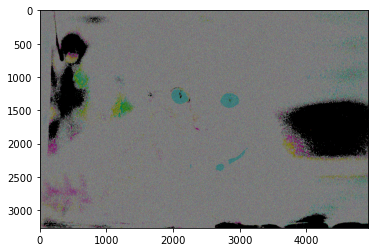

In [38]:
new_image = image*Noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

## Matrix operations

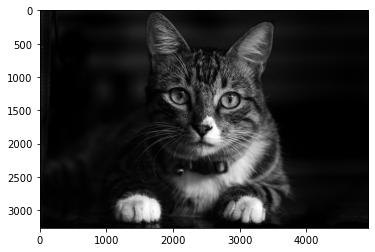

In [40]:
im_gray = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
im_gray.shape

plt.imshow(im_gray,cmap='gray')
plt.show()

We cWe can apply algorithms designed for matrices. We can use Singular Value Decomposition, decomposing our image matrix into a product of three matrices.
an apply.

In [42]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True)

In [43]:
s.shape

(3264,)

We can convert  <code>s</code> to a diagonal matrix <code>S</code>:

In [44]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

We can plot the matrix `U` and `V`:


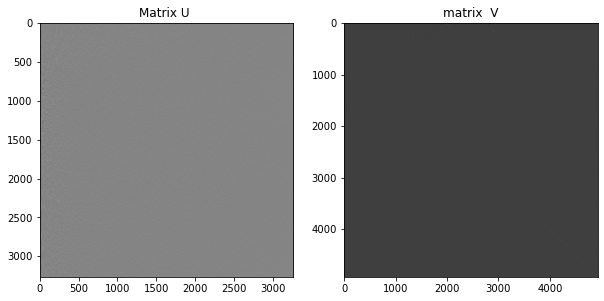

In [45]:
 plot_image(U,V,title_1="Matrix U ",title_2="matrix  V")

We see most of the elements in `S` are zero:


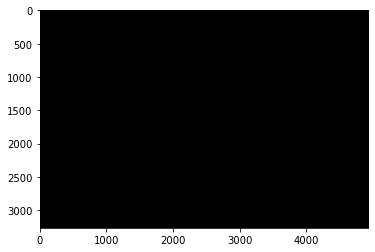

In [46]:
plt.imshow(S,cmap='gray')
plt.show()

We can find the matrix product of all the matrices. First, we can perform matrix multiplication on `S` and `U` and assign it  to `B` and plot the results:


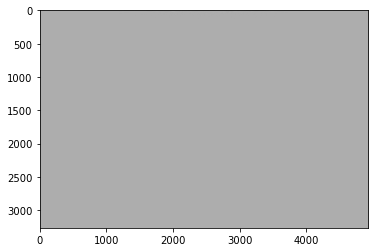

In [47]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

We can find the matrix product of `U`, `S`, and `B`. We see it’s the entire image:


In [48]:
A = U.dot(B)

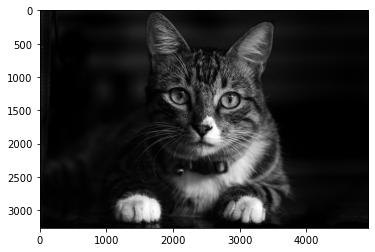

In [49]:
plt.imshow(A,cmap='gray')
plt.show()

It turns out many elements are redundant, so we can eliminate some rows and columns of `S` and `V` and approximate the image by finding the product.


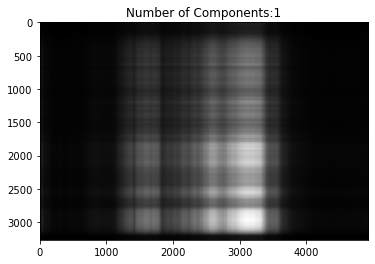

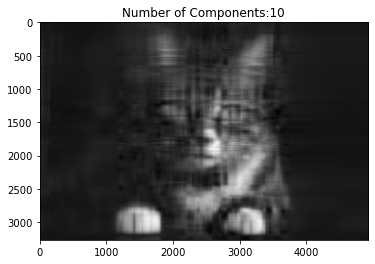

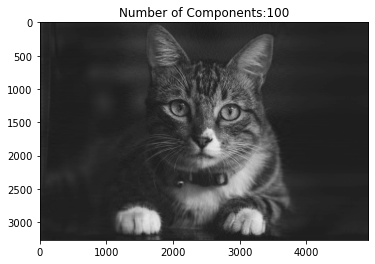

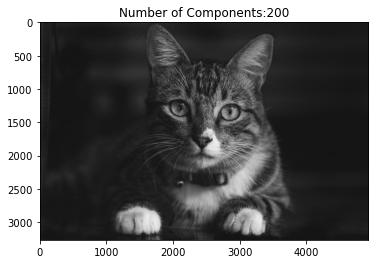

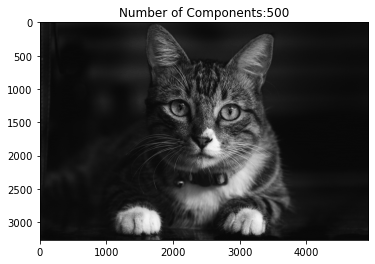

In [51]:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()

We see we only need 100 to 200 Components to represent the image.

* images where taken from Kelvin Valerio from Pexels: https://www.pexels.com/es-es/foto/gato-marron-con-ojos-verdes-617278/

* Notes from coursera course: https://www.coursera.org/learn/introduction-computer-vision-watson-opencv/ungradedLti/QCQQZ/geometric-transformations-with-opencv